#Activation functions:

(This functions are mentioned on the first lecture.)
* <a>The sigmoid activation function</a> is useful when dealing with probabilities because it returns values between 0 and 1. `tf.math.sigmoid(z)`

* <a> Hyperbolic tangent </a>: `tf.math.tanh(z)`

* <a> RELU </a>: `tf.nn.relu(z)`

#Loss functions

* <a>Binary Cross Entropy Loss</a>, for binary classification functions.  
```
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y,predicted))
```

* <a>Cross Entropy Loss</a>, for classification functions.  
```
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # inside a model.compile
```

* <a>Mean Squared Error Loss</a>, for binary classification functions.  
```
loss = tf.reduce_mean(tf.square(tf.substract(y,predicted))
```

* <a>Softmax cross entropy with Logits</a>, they use it for sentiment analysis
```
loss = tf.nn.softmax_cross_entropy_with_logits(y, predicted)
```

* <a>sigmoid cross entropy with logits</a>, they use it for image loss (binary image classification)
```
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
```






#Gradient Descent


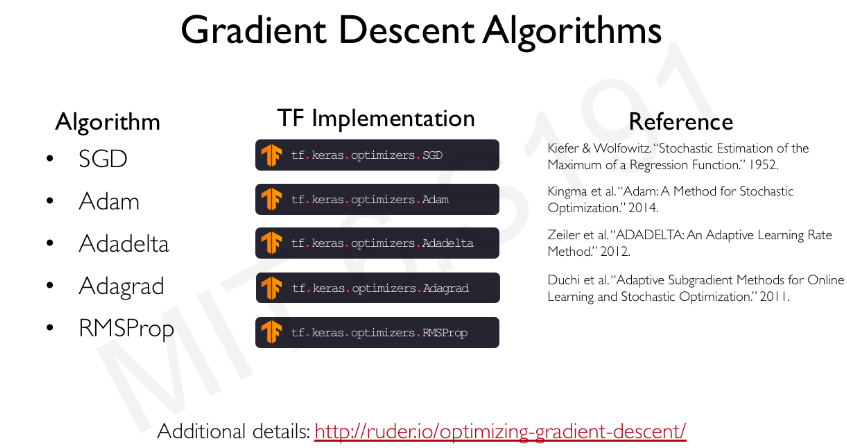

##To prevent overfitting we use regularization

There are regularization methods: for example:

* Dropout: it randomly sets some activations to zero (with some probability). `tf.keras.layers.Dropout(p=.5)`. Here it is forced to build a more robust representation and not rely, on a single "channel"

* Early Stopping: It stops training before it can overfit (Before it diverges from the Testing data)



#Layers

* <a>tf.keras.layers.SimpleRNN(rnn_units)</a> simple RNN, useful when you have sequential inputs and need the network to remember data.

* <a>tf.keras.layers.LSTM(num_units)</a> simple LSTM, useful when you have sequential inputs but need to remember long-term data.

* <a>tf.keras.layers.Dense(n_output_nodes)</a> Densly connected layer

* <a>tf.keras.layers.Embedding()</a> Turns positive integers (indexes) into dense vectors of fixed size. eg. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]. I am not particularly sure of why or when this is used.   (https://www.youtube.com/watch?v=qpb_39IjZA0). It seems that the embedding layer is used mostly for working with text and it transforms the words (or characters?) integers so we can have a context of how similar are they.

* <a>tf.keras.layers.Conv2D(filters, kernel_size, strides)</a> A convolutional neural network, mostly used to solve computer vision tasks

* <a>tf.keras.layers.BatchNormalization()</a> Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

#Model utility functions:

* <a>model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))</a> Loads weights from a checkpoint file

* <a>model.save_weights(checkpoint_prefix)</a> Saves to a checkpoint dir... `checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")`

* <a>model.build(tf.TensorShape([batch_size, None]))</a> After loading a checkpoint you must initialize the model with a new input (Can be None) and the size of the batch.






#Models

* <a> Common model structure </a>:
    1. Sequential(layers)
    2. Compile(Loss function, optimizer, metrics) 

* <a>For a Computer vision model</a> 
    
    1. Add a Conv layer `tf.keras.layers.Conv2D()`
    2. Add a Non-linearity layer  `tf.keras.activations.*`
    3. Add a pooling layer `tf.keras.layers.MaxPool2D()`
    4. (possible) - flatten() `tf.keras.layers.Flatten`
    5. Pass through Dense: `Dense(n_outputs, activation=None)`


* <a>De-Biased Variable-Autoencoder (DB-VAE)</a> (Lab2-pt2) They made this to create a clasification network out of an autoencoder. this model basically selectively selects underrepresented data (according to latent features it learns) and feeds it more often to the training of the model, giving a best representation of the data and more accurate results. 
      

#Notes:

* Note, There are two ways of training a model:
  1. Use the model.fit() and let tf handle everything.
  2. Use the gradients and gradienttape to have more control over all the training operations.


* Gradient training must be done in a loop. 

  * steps of gradient training:

    1. Pass the input through the model and get an output: `logits = cnn_model(images)`

    2. Get the loss value of the logits (model output) and the real labels: `loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)`

    3. Get the gradients from the loss value and the trainable variables of the model. `grads = tape.gradient(loss_value, cnn_model.trainable_variables)`

    4. Apply the gradients to the trainable variables of the model: `optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))`

  * Training loop:
    1. For every epoch grab a batch -> apply the gradient(prev section), NOTE: in the code they return the loss_value to plot and show it -> record the loss to watch the network progress

```
for epoch in range(num_epochs):
  for idx in tqdm(range(loader.get_train_size()//batch_size)):
    # Grab a batch of training data and propagate through the network
    x, y = loader.get_batch(batch_size)
    loss = standard_train_step(x, y)

    # Record the loss and plot the evolution of the loss as a function of training
    loss_history.append(loss.numpy().mean())
    plotter.plot(loss_history.get())
```












